In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")


In [2]:
data=pd.read_csv("Fertilizer Prediction.csv")
data.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.describe()



,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
data.shape

(99, 9)

### Finding the missing values

In [5]:
data.isnull().sum()

Temperature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

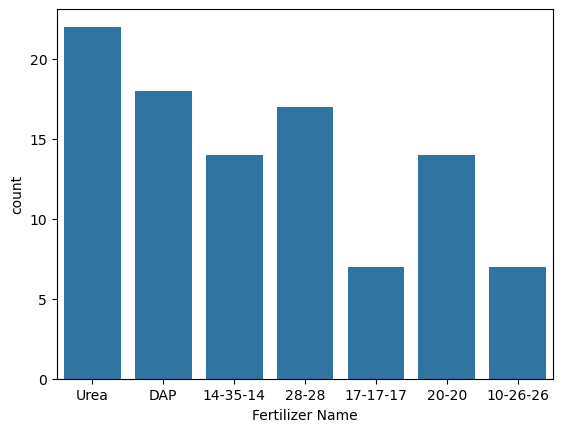

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='Fertilizer Name');

In [7]:
data['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [8]:
data['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

### Mapping Categorical Features to numeric values for training model



In [9]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11

}



In [10]:
data['Soil_Num']=data['Soil Type'].map(soil_dict)
data['Crop_Num']=data['Crop Type'].map(crop_dict)

In [11]:
data=data.drop(['Soil Type','Crop Type'],axis=1)
data.head()

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil_Num,Crop_Num
0,26,52,38,37,0,0,Urea,2,11
1,29,52,45,12,0,36,DAP,1,1
2,34,65,62,7,9,30,14-35-14,4,2
3,32,62,34,22,0,20,28-28,5,7
4,28,54,46,35,0,0,Urea,3,4


### Splitting the Dataset into X and Y



In [12]:


X=data.drop(['Fertilizer Name'],axis=1)
Y=data['Fertilizer Name']

### Splitting Dataset into Train and Test for checking the Accuracy



In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
X_train.shape

(79, 8)

In [15]:
X_test.shape

(20, 8)

#### Model Building



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred=md.predict(X_test)

    print(f"the Accuracy of {name} is ",accuracy_score(Y_test,ypred))


/usr/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the Accuracy of Logistic Regression is  1.0
the Accuracy of Naive Bayes is  1.0
the Accuracy of Support Vector Machine is  0.9
the Accuracy of K-Nearest Neighbors is  0.95
the Accuracy of Decision Tree is  0.95
the Accuracy of Random Forest is  1.0
the Accuracy of Bagging is  1.0
the Accuracy of AdaBoost is  0.9
the Accuracy of Gradient Boosting is  0.95
the Accuracy of Extra Trees is  0.95


In [17]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)

0.95

In [18]:
def recommendation(Temperature,Humidity,Moisture,Nitrogen,Phosphorous,Potassium,Soil_Num,Crop_Num):
    features = np.array([[Temperature,Humidity,Moisture,Nitrogen,Phosphorous,Potassium,Soil_Num,Crop_Num]])
    prediction = classifier.predict(features).reshape(1,-1)

    return prediction[0]

In [19]:
Temperature=22
Humidity=59
Moisture=19
Nitrogen=12
Potassium=7
Phosphorous=10
Soil_Num=4
Crop_Num=8
predict=recommendation(Temperature,Humidity,Moisture,Nitrogen,Phosphorous,Potassium,Soil_Num,Crop_Num)
predict[0]

'17-17-17'

### Create a pickle file for saving the model



In [20]:

import pickle
pickle_out = open("Fertclassifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()